Melissa Mullen

September 9, 2020

COMP 740

Homework 1

**Part 2 of the Homework:**

1. Walmart Sales Forecasting: Supervised Learning & Regression
2. Sentiment Analysis on Movie Reviews: Supervised Learning & Classification
3. Digit Recognizer: Supervised Learning & Classification
4. House Prices: Supervised Learning & Regression
5. Leaf Classification: Supervised Learning & Classification

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns # visualization package
import matplotlib.pyplot as plt

In [21]:
header = ["variance", "skew", "curtosis", "entropy", "classes"]
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
df = pd.read_csv(url, names=header)

In [22]:
df.head()

,variance,skew,curtosis,entropy,classes
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


**Descriptive Analysis and Null Values Search:**

In this context, value_counts() aren't helpful with the variance, skew, curtosis, and entropy columns since each bill will have different values naturally. Value_counts() is only useful for the classes column, as seen below.

In [23]:
df.classes.value_counts()

0    762
1    610
Name: classes, dtype: int64

In [24]:
df.isnull().sum()

variance    0
skew        0
curtosis    0
entropy     0
classes     0
dtype: int64

As seen above, the data does not contain any null values (yay!)

**Visualize the data:**

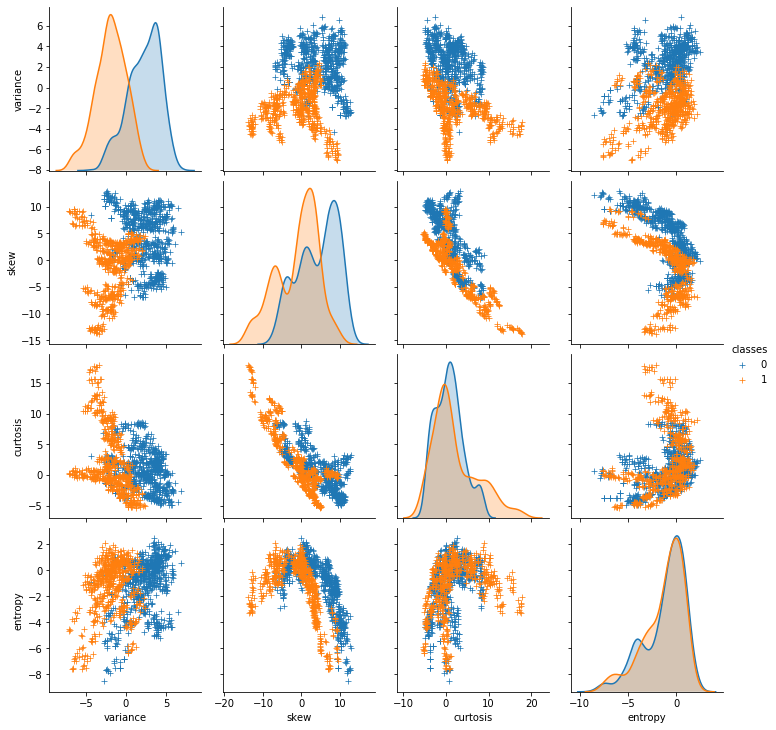

In [25]:
graph = sns.pairplot(df, hue='classes', markers='+')
plt.show()

In [26]:
# graph = sns.violinplot(y='classes', x='variance', data=df, inner='quartile')
# plt.show()
# graph = sns.violinplot(y='classes', x='skew', data=df, inner='quartile')
# plt.show()
# graph = sns.violinplot(y='classes', x='curtsies', data=df, inner='quartile')
# plt.show()
# graph = sns.violinplot(y='classes', x='entropy', data=df, inner='quartile')
# plt.show()

**Pairplot:** The pairplot above visualizes the relationships between the four attributes variance, skew, curtosis, and entropy. The class attribute is indicated by color, where the 0 class is blue and the 1 class is orange. 

**Violin plot:** I included code above for the violin plots, but due to the wide variety of values in the variance, skew, curtosis, and entropy columns, the graphs were very sloppy and (in my opinion) not visually useful.

**Prepare the train set and the test set:**

In [27]:
X = df.drop(['classes'], axis=1)
y = df['classes']

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1, stratify=y)

This model is using a 60 - 40 split, where 40% of the data is used in the test split.

**Train the model with all features, calculate the accuracy of the model:**

In [29]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=40, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [30]:
y_pred = ppn.predict(X_test)
y_test

126     0
7       0
1082    1
188     0
719     0
       ..
1150    1
876     1
642     0
348     0
297     0
Name: classes, Length: 549, dtype: int64

In [31]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.9817850637522769

The 60 - 40 split produced an accuracy score of ~ 0.9818

**Trying a 80 - 20 split:**

In [32]:
X = df.drop(['classes'], axis=1)
y = df['classes']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [33]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=40, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [34]:
y_pred = ppn.predict(X_test)

from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.9854545454545455

The 80 - 20 split produced a slightly higher accuracy score of ~ 0.9855

**BONUS: Train a model with a subset of the features:**

In [35]:
print(df.shape)
df_sub = df.iloc[500:1000]
print(df_sub.shape)
df_sub['classes'].value_counts()

(1372, 5)
(500, 5)


0    262
1    238
Name: classes, dtype: int64

The new dataframe containing a subset of the features is called df_sub. This subset contains approximately 50% real bills and 50% fake bills. 

In [36]:
X = df_sub.drop(['classes'], axis=1)
y = df_sub['classes']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1, stratify=y)

In [37]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=40, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [38]:
y_pred = ppn.predict(X_test)

from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.975

After creating a subset and training the model with a 60-40 split, this model produced an accuracy score 0.975. When I used the entire dataset to train this same model, the accuracy score was ~ 0.9818. Consequently, using the entire dataset rather than a subset produced a higher accuracy score.   

**Training a model with only two feature columns:**

In [45]:
df_two = df[['variance', 'skew', 'classes']]
print(df_two.shape)
df_two.head()

(1372, 3)


,variance,skew,classes
0,3.62160,8.6661,0
1,4.54590,8.1674,0
2,3.86600,-2.6383,0
3,3.45660,9.5228,0
4,0.32924,-4.4552,0


df_two is a subset of df that contains only the variance, skew, and classes columns. I chose variance and skew because, referring to the graphs above, they looked to be fairly separated by class. 

In [46]:
X = df_two.drop(['classes'], axis=1)
y = df_two['classes']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1, stratify=y)

In [47]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=40, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [48]:
y_pred = ppn.predict(X_test)

from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.8506375227686703

Using the same 60-40 split, this model produced a significantly lower accuracy score of ~ 0.8506. Consequently, more features, or at least not these two paired together, are required to produce a higher accuracy score. 